In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cufflinks as cf
%reload_ext autoreload
%autoreload 2
cf.set_config_file(world_readable=True,theme='pearl')
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [38]:
df = pd.read_csv('../data/ceping.csv',encoding='gb18030')
df=df[df['年级段']==1]
df_z = df[['Z学习动力','Z学习能力','Z学习毅力']]
df_t = df[['T学习动力','T学习能力','T学习毅力']]

In [47]:
df_z.head(10)

,Z学习动力,Z学习能力,Z学习毅力,categories
0,0.326834,-0.347598,1.038155,category1
1,0.735795,-0.900866,0.062633,category1
2,0.698210,0.165055,1.190147,category1
3,-0.636099,-0.512471,0.000674,category4
4,-0.622144,-0.287632,0.452293,category4
5,0.695869,0.319867,1.190147,category1
6,0.884859,0.150280,0.816783,category1
7,0.784352,0.450860,0.889068,category1
8,0.800482,0.024850,0.807909,category1
9,0.953106,0.256309,0.661080,category1


In [40]:
df_z[df_z.index==42]
# df_t

,Z学习动力,Z学习能力,Z学习毅力
42,-0.955201,-0.165866,-0.763802


Text(0.5, 0, '聚类集群数')

Text(0, 0.5, '分数')

Text(0.5, 1.0, 'Elbow 曲线')

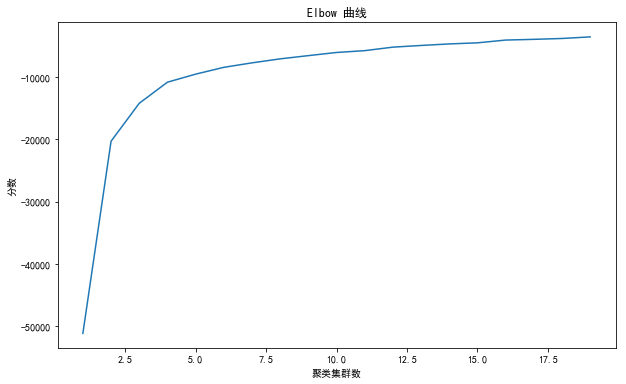

In [41]:
data = df_t
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('聚类集群数')
plt.ylabel('分数')
plt.title('Elbow 曲线')
plt.show()

Text(0.5, 0, '聚类集群数')

Text(0, 0.5, '分数')

Text(0.5, 1.0, 'Elbow 曲线')

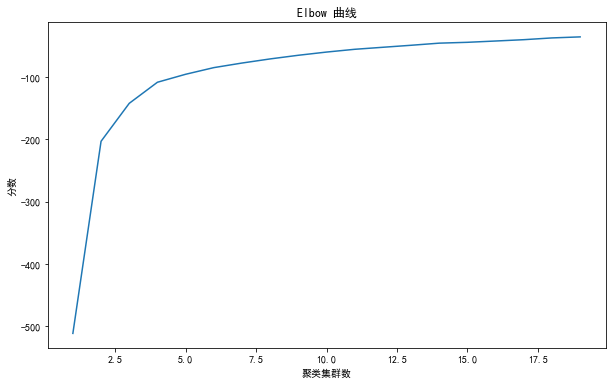

In [42]:
data = df_z
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('聚类集群数')
plt.ylabel('分数')
plt.title('Elbow 曲线')
plt.show()

In [43]:
X = df_z
X = X.reset_index(drop=True)
km = KMeans(n_clusters=4)
km.fit(X)
km.predict(X)
labels = km.labels_

df_z['categories']=labels
df_z['categories']=df_z.categories.apply(lambda x: 'category'+str(x+1))

df_z.iplot(kind='scatter3d',
           x='Z学习动力',y='Z学习能力',z='Z学习毅力',
           size=5,
           categories='categories',
           xTitle='学习动力',
           yTitle='学习能力',
           zTitle='学习毅力',
           title='Z分数均值聚类',
           opacity=1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1, 0,
       1, 2, 1, 3, 1, 0, 3, 0, 3, 3, 1, 0, 1, 3, 0, 3, 3, 3, 0, 3, 0, 2,
       0, 0, 0, 0, 1, 3, 1, 1, 0, 3, 1, 1, 1, 3, 3, 0, 1, 3, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 3, 1, 0, 0, 0, 1, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 1,
       0, 3, 0, 1, 3, 3, 3, 0, 2, 1, 0, 3, 3, 0, 1, 1, 1, 3, 3, 1, 3, 2,
       0, 1, 0, 3, 3, 2, 3, 1, 3, 1, 3, 3, 3, 1, 0, 3, 3, 2, 1, 1, 3, 3,
       1, 1, 3, 3, 3, 1, 1, 1, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 3, 3, 0, 2, 2, 1, 1, 3, 3, 3, 0, 1, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 2, 0, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 3, 0, 0, 1, 0, 3, 0, 1, 3, 1, 1, 1])

e:\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [44]:
centers = km.cluster_centers_
centers

array([[ 0.85800571,  0.13972035,  0.78649876],
       [-0.77020248, -0.13100005, -0.82359222],
       [-1.7104409 , -0.82869383, -2.41358212],
       [-0.12351863,  0.10012643,  0.20786221]])

In [45]:
X = df_t
X = X.reset_index(drop=True)
km = KMeans(n_clusters=4)
km.fit(X)
km.predict(X)
labels = km.labels_
df_t['categories']=labels
df_t['categories']=df_t.categories.apply(lambda x: 'category'+str(x+1))

df_t.iplot(kind='scatter3d',
           x='T学习动力',y='T学习能力',z='T学习毅力',
           size=5,
           categories='categories',
           xTitle='学习动力',
           yTitle='学习能力',
           zTitle='学习毅力',
           title='T分数均值聚类',
           opacity=1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 0, 2, 0, 2, 3, 0,
       3, 1, 3, 2, 3, 0, 2, 0, 2, 2, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 0, 0, 3, 2, 3, 3, 0, 2, 3, 3, 3, 2, 2, 0, 3, 2, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 2, 3, 0, 0, 0, 3, 3, 0, 2, 3, 3, 2, 3, 1, 3, 2, 3,
       0, 2, 0, 3, 2, 2, 2, 0, 1, 3, 0, 2, 2, 0, 3, 3, 3, 2, 2, 3, 2, 1,
       0, 3, 0, 2, 2, 1, 2, 3, 2, 3, 2, 2, 2, 3, 0, 2, 2, 1, 3, 3, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 3, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 2, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 2, 2, 0, 1, 1, 3, 3, 2, 2, 2, 0, 3, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 1, 0, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 2, 0, 0, 3, 0, 2, 0, 3, 2, 3, 3, 3])

e:\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [46]:
centers = km.cluster_centers_
centers

array([[58.58005705, 51.39720353, 57.86498757],
       [32.89559102, 41.71306166, 25.86417876],
       [48.76481373, 51.00126432, 52.07862209],
       [42.29797516, 48.68999954, 41.76407779]])